In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.io as pio

# Define the color palette
colors = ['#5b424c', '#c7998c', '#1f6566', '#f2d4bc', '#253140', '#1f1b17', '#011c50', '#000000']
background_color = '#e6e4dd'

# -----------------------------------
# Matplotlib Configuration
# -----------------------------------
custom_style = {
    # Figure
    'figure.facecolor': background_color,
    'figure.figsize': (10, 6),
    
    # Axes
    'axes.facecolor': background_color,
    'axes.edgecolor': '#000000',
    'axes.labelcolor': '#000000',
    'axes.prop_cycle': mpl.cycler(color=colors),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    
    # Grid
    'grid.color': '#d0cec8',
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
    
    # Ticks
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    
    # Legend
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.facecolor': background_color,
    'legend.edgecolor': '#d0cec8',
    
    # Saving figures
    'savefig.facecolor': background_color,
    'savefig.dpi': 100
}

# Apply the custom style
plt.rcParams.update(custom_style)

# -----------------------------------
# Plotly Configuration
# -----------------------------------
custom_template = go.layout.Template()

# Set the color sequence
custom_template.layout.colorway = colors

# Set the background colors
custom_template.layout.paper_bgcolor = background_color
custom_template.layout.plot_bgcolor = background_color

# Configure axes
axes_common = dict(
    showgrid=True,
    gridcolor='#d0cec8',
    gridwidth=1,
    zeroline=True,
    zerolinecolor='#000000',
    zerolinewidth=1.5,
    showline=True,
    linecolor='#000000',
    linewidth=1,
    ticks='outside',
    tickcolor='#000000'
)

# Apply to x and y axes
custom_template.layout.xaxis = axes_common
custom_template.layout.yaxis = axes_common

# Other styling elements
custom_template.layout.margin = dict(l=60, r=40, t=60, b=60)
custom_template.layout.font = dict(color='#000000')
custom_template.layout.legend = dict(
    bgcolor=background_color,
    bordercolor='#d0cec8',
    borderwidth=1
)

# Register the template and set as default
pio.templates['custom_theme'] = custom_template
pio.templates.default = 'custom_theme'

# Overview and Problem Statement

The hotel industry faces significant challenges in managing revenue and operational efficiency due to unpredictable guest behavior, particularly booking cancellations and no-shows. These issues lead to vacant rooms, inefficient resource allocation, and reduced customer satisfaction, ultimately impacting profitability. To address this, predictive analytics and data-driven strategies are being employed to better understand and mitigate these challenges. By leveraging historical booking data, including reservation details, customer demographics, and payment methods, hotels can identify patterns and trends that influence cancellations and no-shows. This enables them to implement targeted interventions, optimize pricing strategies, and improve overall guest experience.

Hotel A is experiencing significant revenue losses due to unpredictable booking cancellations and no-shows. These events result in vacant rooms, inefficient staffing, and operational disruptions, ultimately affecting the hotel’s profitability and customer loyalty. To address this, the hotel’s management has provided a dataset containing 27,500 booking records with over 20 attributes, including reservation details, customer demographics, and payment methods. So the hotel aims to develop a predictive analytics solution to forecast cancellations and no-shows accurately. By understanding the key factors driving these behaviors, such as booking channels, deposit types, and customer demographics, the hotel can implement proactive measures to reduce revenue loss and enhance guest satisfaction. The ultimate goal is to create a robust system that not only predicts cancellations but also provides actionable insights to improve decision-making and operational practices.


## Importing Library

In [1]:
# Core Data Manipulation and Analysis
import pandas as pd
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.figure_factory as ff  

# Statistical Analysis
from scipy import stats
from scipy.stats import pearsonr, kurtosis, skew

# Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, r2_score,
    mean_absolute_error
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling Missing Data
import missingno as msno  

# Advanced Visualization
from bokeh.plotting import figure, show  

# Miscellaneous
import datetime
import os  
import warnings  
from collections import Counter
import itertools
import time
import random  

# Additional Libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
from sklearn.inspection import permutation_importance  


# **Dataset**

The dataset provided contains 27,500 booking reservations for a hotel chain, with over 20 attributes that capture details about each reservation. It includes information such as customer demographics (e.g., age, gender, ethnicity, income), booking details (e.g., booking date, expected check-in/check-out dates, number of adults/children/babies), payment and deposit types, booking channels (e.g., direct, online), and reservation status (check-in, cancellation, or no-show). The dataset also categorizes hotels into three types: Airport Hotels, Resorts, and City Hotels, each potentially exhibiting unique cancellation patterns. The goal is to analyze this data to predict cancellations and no-shows, identify key factors driving these behaviors, and ultimately help the hotel reduce revenue loss and improve operational efficiency.

## Importing the dataset

In [2]:
train_df = pd.read_csv(r"C:\Users\User\Downloads\Hotel-A-train.csv")
validation_df = pd.read_csv(r"C:\Users\User\Downloads\Hotel-A-validation.csv")

In [3]:
train_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,No Deposit,Online,Yes,check-out,Yes,0,106.440241
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,BB,No,No,Non-Refundable,Online,Yes,check-out,No,0,158.039564
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,BB,No,No,Refundable,Online,Yes,check-out,No,0,212.610780
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,BB,No,No,No Deposit,Agent,Yes,check-out,Yes,5,106.146407
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,BB,No,No,Refundable,Direct,No,check-out,Yes,10,159.384439


## Structure of the data

In [4]:
train_df.shape

(27499, 24)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reservation-id          27499 non-null  int64  
 1   Gender                  27499 non-null  object 
 2   Age                     27499 non-null  int64  
 3   Ethnicity               27499 non-null  object 
 4   Educational_Level       27499 non-null  object 
 5   Income                  27499 non-null  object 
 6   Country_region          27499 non-null  object 
 7   Hotel_Type              27499 non-null  object 
 8   Expected_checkin        27499 non-null  object 
 9   Expected_checkout       27499 non-null  object 
 10  Booking_date            27499 non-null  object 
 11  Adults                  27499 non-null  int64  
 12  Children                27499 non-null  int64  
 13  Babies                  22744 non-null  float64
 14  Meal_Type               27499 non-null

The dataset contains 27,499 entries (rows) and 24 columns, representing booking reservations for a hotel chain. It includes a mix of numerical (e.g., Age, Adults, Room_Rate) and categorical (e.g., Gender, Ethnicity, Hotel_Type) features. Key attributes include customer details (e.g., Gender, Age, Income), booking specifics (e.g., Expected_checkin, Booking_date, Meal_Type), and reservation outcomes (e.g., Reservation_Status). Notably, the Babies column has some missing values (22,744 non-null out of 27,499), while all other columns are complete. The dataset also captures behavioral aspects like Previous_Cancellations, Deposit_type, and Use_Promotion, which are crucial for predicting cancellations and no-shows. The target variable, Reservation_Status, indicates whether a guest checked in, canceled, or was a no-show.

# Preprossesing

### Converting to correct data types

To convert the Expected_checkin, Expected_checkout, and Booking_date columns from object (string) type to datetime type

In [6]:
# Convert 'Expected_checkin', 'Expected_checkout', and 'Booking_date' to datetime
train_df['Expected_checkin'] = pd.to_datetime(train_df['Expected_checkin'])
train_df['Expected_checkout'] = pd.to_datetime(train_df['Expected_checkout'])
train_df['Booking_date'] = pd.to_datetime(train_df['Booking_date'])

# Verify the conversion
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Reservation-id          27499 non-null  int64         
 1   Gender                  27499 non-null  object        
 2   Age                     27499 non-null  int64         
 3   Ethnicity               27499 non-null  object        
 4   Educational_Level       27499 non-null  object        
 5   Income                  27499 non-null  object        
 6   Country_region          27499 non-null  object        
 7   Hotel_Type              27499 non-null  object        
 8   Expected_checkin        27499 non-null  datetime64[ns]
 9   Expected_checkout       27499 non-null  datetime64[ns]
 10  Booking_date            27499 non-null  datetime64[ns]
 11  Adults                  27499 non-null  int64         
 12  Children                27499 non-null  int64 

### Handling Missing Values

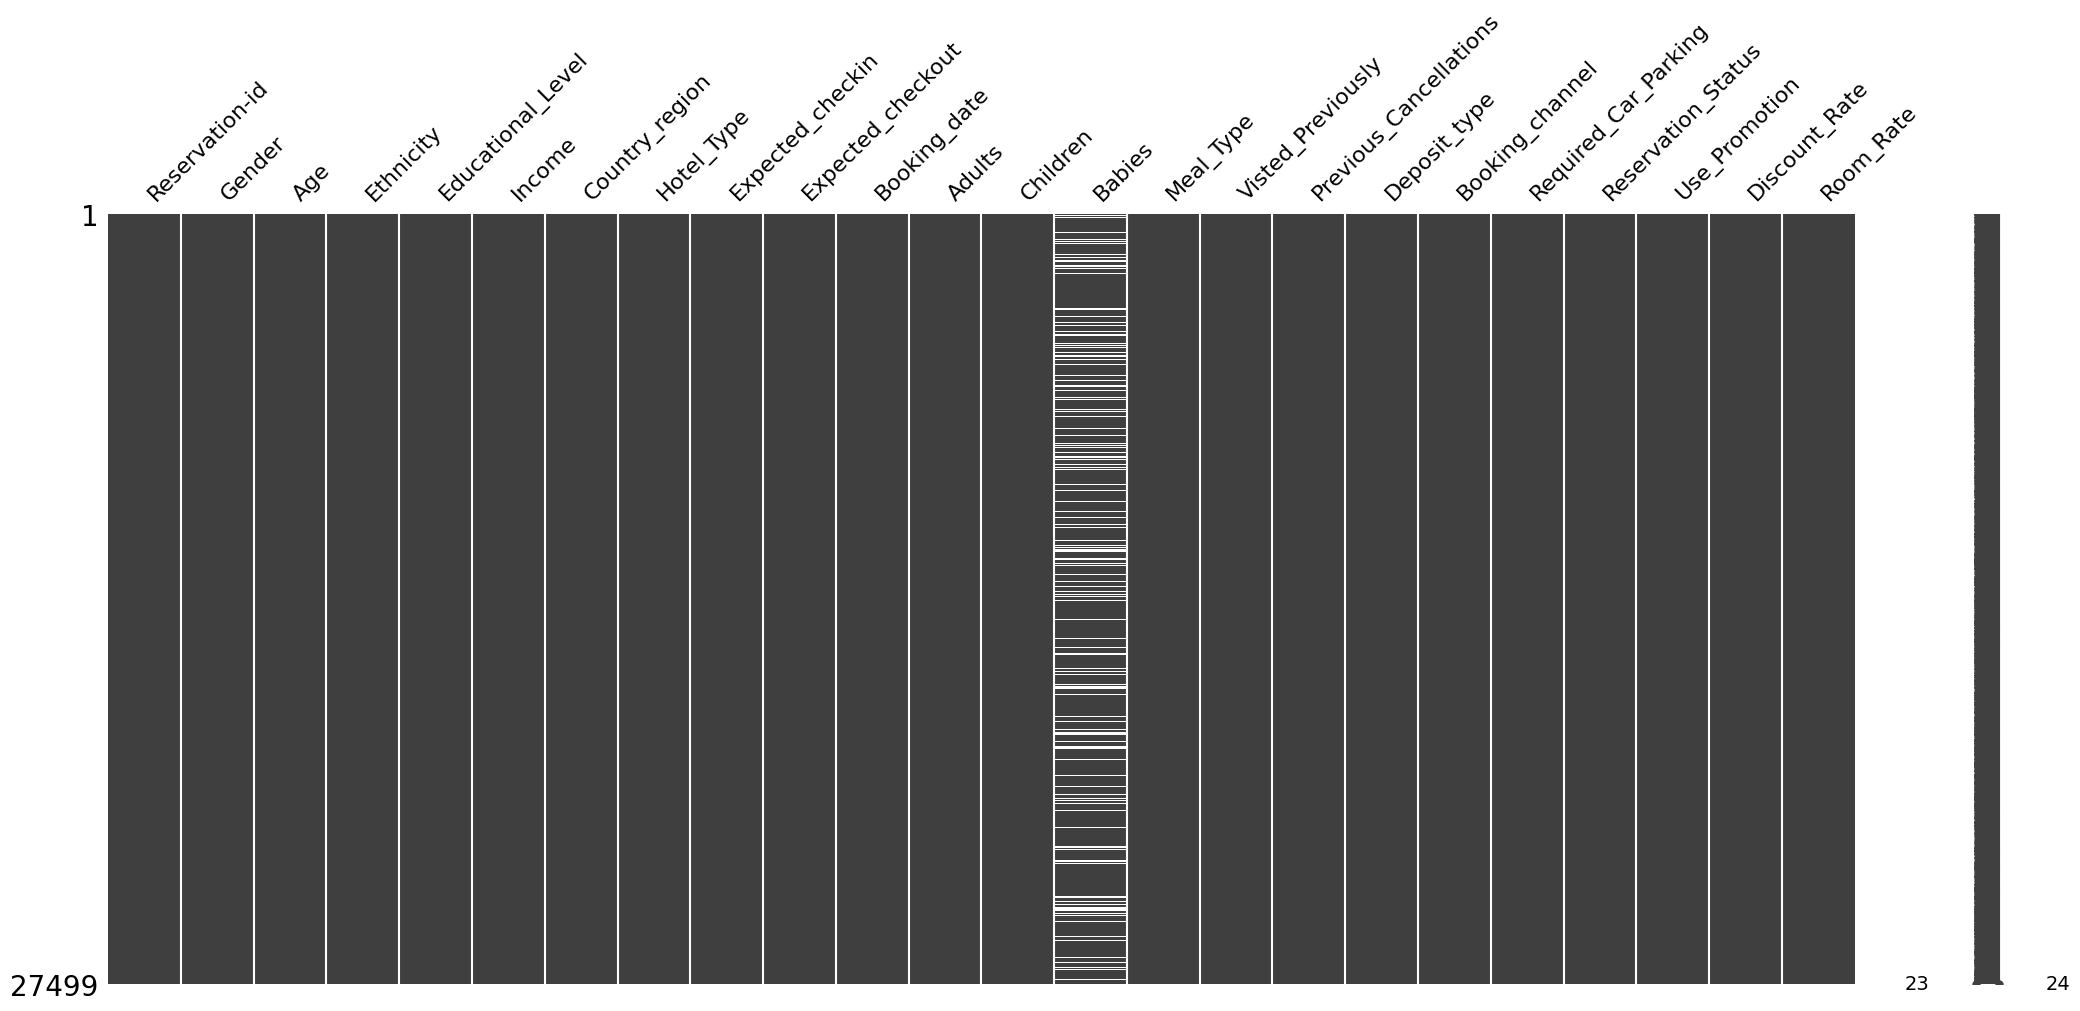

In [7]:
# Check for missing values
msno.matrix(train_df)
plt.show()

In [8]:
# Check for missing values in each column

train_df.isnull().sum()

Reservation-id               0
Gender                       0
Age                          0
Ethnicity                    0
Educational_Level            0
Income                       0
Country_region               0
Hotel_Type                   0
Expected_checkin             0
Expected_checkout            0
Booking_date                 0
Adults                       0
Children                     0
Babies                    4755
Meal_Type                    0
Visted_Previously            0
Previous_Cancellations       0
Deposit_type                 0
Booking_channel              0
Required_Car_Parking         0
Reservation_Status           0
Use_Promotion                0
Discount_Rate                0
Room_Rate                    0
dtype: int64

From the output, it’s clear that only the Babies column has missing values, with 4,755 missing entries out of the total 27,499 rows. All other columns are complete and have no missing values.

In [9]:
train_df['Babies'].value_counts()


Babies
0.0    15920
1.0     5138
2.0     1686
Name: count, dtype: int64

In [10]:
# Check unique values in the 'Babies' column
train_df['Babies'].unique()

array([nan,  0.,  2.,  1.])

Fill Missing Values with 0:
Assumption: Missing values mean no babies were included in the reservation and We also checked the mode, which was 0. Therefore, we filled the missing values with 0

In [11]:
train_df['Babies'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25460\3977692633.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [12]:
# Check for missing values in each column

train_df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

### Checking Unique Values

In [13]:
# Check unique values in the 'Reservation_Status' column (target variable)
print("Reservation_Status:",train_df['Reservation_Status'].unique())

# Check unique values in the 'Gender' column
print("Gender:",train_df['Gender'].unique())

# Check unique values in the 'Ethnicity' column
print("Ethnicity:",train_df['Ethnicity'].unique())

# Check unique values in the 'Educational_Level' column
print("Educational_Level:", train_df['Educational_Level'].unique())

# Check unique values in the 'Income' column
print("Income:", train_df['Income'].unique())

# Check unique values in the 'Country_region' column
print("Country_region:", train_df['Country_region'].unique())

# Check unique values in the 'Hotel_Type' column
print("Hotel_Type:",train_df['Hotel_Type'].unique())

# Check unique values in the 'Meal_Type' column
print("Meal_Type:", train_df['Meal_Type'].unique())

# Check unique values in the 'Visted_Previously' column
print("Visted_Previously:",train_df['Visted_Previously'].unique())

# Check unique values in the 'Previous_Cancellations' column
print("Previous_Cancellations:", train_df['Previous_Cancellations'].unique())

# Check unique values in the 'Deposit_type' column
print("Deposit_type:", train_df['Deposit_type'].unique())

# Check unique values in the 'Booking_channel' column
print("Booking_channel:", train_df['Booking_channel'].unique())

# Check unique values in the 'Required_Car_Parking' column
print("Required_Car_Parking:", train_df['Required_Car_Parking'].unique())

# Check unique values in the 'Use_Promotion' column
print("Use_Promotion:",train_df['Use_Promotion'].unique())

Reservation_Status: ['check-out' 'canceled' 'no-show']
Gender: ['M' 'F']
Ethnicity: ['Latino' 'African American' 'caucasian' 'Asian American']
Educational_Level: ['High-School' 'College' 'Grad' 'Mid-School']
Income: ['<25K' '50K -- 100K' '>100K' '25K --50K']
Country_region: ['North' 'East' 'South' 'West']
Hotel_Type: ['City Hotel' 'Airport Hotels' 'Resort']
Meal_Type: ['BB' 'FB' 'HB']
Visted_Previously: ['No' 'Yes']
Previous_Cancellations: ['No' 'Yes']
Deposit_type: ['No Deposit' 'Non-Refundable' 'Refundable']
Booking_channel: ['Online' 'Agent' 'Direct']
Required_Car_Parking: ['Yes' 'No']
Use_Promotion: ['Yes' 'No']


In [14]:
# Standardizing Ethnicity (Capitalization)
train_df['Ethnicity'] = train_df['Ethnicity'].replace({'caucasian': 'Caucasian'})


In [15]:
# Check unique values in the 'Ethnicity' column
print("Ethnicity:", train_df['Ethnicity'].unique())

Ethnicity: ['Latino' 'African American' 'Caucasian' 'Asian American']


### Categorizing Income Levels for Better Analysis

categorize the income ranges into four meaningful groups: Low, Lower-Middle, Upper-Middle, and High. This will help in understanding the distribution of income levels and their impact on booking behavior.

In [16]:
# Define a mapping dictionary for income categories
income_mapping = {
    '<25K': 'Low',
    '25K --50K': 'Lower-Middle',
    '50K -- 100K': 'Upper-Middle',
    '>100K': 'High'
}

# Apply the mapping to the 'Income' column
train_df['Income'] = train_df['Income'].map(income_mapping)

# Verify the changes
print("Income Categories after Mapping:", train_df['Income'].unique())

Income Categories after Mapping: ['Low' 'Upper-Middle' 'High' 'Lower-Middle']


### Checking Duplicate Rows

In [17]:
# Check for duplicate rows
print("Number of duplicate rows:", train_df.duplicated().sum())

Number of duplicate rows: 0


# Data Cleaning: Identifying and Fixing Errors in Discounts and Dates

Finding Error Discounts (Discounts Less than 0 or More than 100)

In [18]:
invalid_discounts = train_df[(train_df['Discount_Rate'] < 0) | (train_df['Discount_Rate'] > 100)]
print("\nRows with Invalid Discount Rates:\n", invalid_discounts)




Rows with Invalid Discount Rates:
 Empty DataFrame
Columns: [Reservation-id, Gender, Age, Ethnicity, Educational_Level, Income, Country_region, Hotel_Type, Expected_checkin, Expected_checkout, Booking_date, Adults, Children, Babies, Meal_Type, Visted_Previously, Previous_Cancellations, Deposit_type, Booking_channel, Required_Car_Parking, Reservation_Status, Use_Promotion, Discount_Rate, Room_Rate]
Index: []

[0 rows x 24 columns]


Finding Error Dates (If Expected Checkout Comes Earlier than check in)

In [19]:
invalid_dates = train_df[train_df['Expected_checkout'] < train_df['Expected_checkin']]
print("\nRows with Invalid Dates:\n", invalid_dates)



Rows with Invalid Dates:
 Empty DataFrame
Columns: [Reservation-id, Gender, Age, Ethnicity, Educational_Level, Income, Country_region, Hotel_Type, Expected_checkin, Expected_checkout, Booking_date, Adults, Children, Babies, Meal_Type, Visted_Previously, Previous_Cancellations, Deposit_type, Booking_channel, Required_Car_Parking, Reservation_Status, Use_Promotion, Discount_Rate, Room_Rate]
Index: []

[0 rows x 24 columns]



Finding Error Dates (If Booking Date Comes after Checkin dates)





In [20]:
invalid_booking_dates = train_df[train_df['Booking_date'] > train_df['Expected_checkin']]
print("\nInvalid Booking Dates:\n", invalid_booking_dates[['Booking_date', 'Expected_checkin', 'Expected_checkout','Booking_channel','Reservation_Status']])




Invalid Booking Dates:
       Booking_date Expected_checkin Expected_checkout Booking_channel  \
6       2015-07-04       2015-07-03        2015-07-04          Online   
18      2015-07-03       2015-07-02        2015-07-03          Online   
54      2015-07-06       2015-07-03        2015-07-07          Online   
56      2015-07-04       2015-07-03        2015-07-04          Direct   
57      2015-07-04       2015-07-03        2015-07-04          Online   
...            ...              ...               ...             ...   
26856   2016-08-14       2016-08-13        2016-08-17          Online   
27191   2016-08-23       2016-08-22        2016-08-25           Agent   
27367   2017-08-30       2017-08-27        2017-08-30          Online   
27432   2016-08-31       2016-08-29        2016-08-31          Direct   
27462   2016-09-01       2016-08-30        2016-09-01          Online   

      Reservation_Status  
6              check-out  
18             check-out  
54             ch

In [21]:
train_df.loc[train_df['Booking_date'] > train_df['Expected_checkin'], 'Booking_date'] = train_df['Expected_checkin']



In [22]:
invalid_booking_dates = train_df[train_df['Booking_date'] > train_df['Expected_checkin']]
print("\nInvalid Booking Dates:\n", invalid_booking_dates[['Booking_date', 'Expected_checkin', 'Expected_checkout','Booking_channel','Reservation_Status']])


Invalid Booking Dates:
 Empty DataFrame
Columns: [Booking_date, Expected_checkin, Expected_checkout, Booking_channel, Reservation_Status]
Index: []


# Handling Outliers

In [23]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print("\nStatistical Summary of Numeric Columns:\n", train_df[numeric_cols].describe())



Statistical Summary of Numeric Columns:
        Reservation-id           Age        Adults      Children        Babies  \
count    2.749900e+04  27499.000000  27499.000000  27499.000000  27499.000000   
mean     5.016461e+07     43.977454      2.232118      1.743882      0.309466   
std      2.886911e+07     15.303148      1.180172      0.721972      0.579941   
min      3.154000e+03     18.000000      1.000000      1.000000      0.000000   
25%      2.523943e+07     31.000000      1.000000      1.000000      0.000000   
50%      5.014996e+07     44.000000      2.000000      2.000000      0.000000   
75%      7.518288e+07     57.000000      3.000000      2.000000      0.000000   
max      9.999900e+07     70.000000      5.000000      3.000000      2.000000   

       Discount_Rate     Room_Rate  
count   27499.000000  27499.000000  
mean        8.293029    155.645134  
std         7.841725     38.314829  
min         0.000000    100.000000  
25%         0.000000    124.000000  
50%   

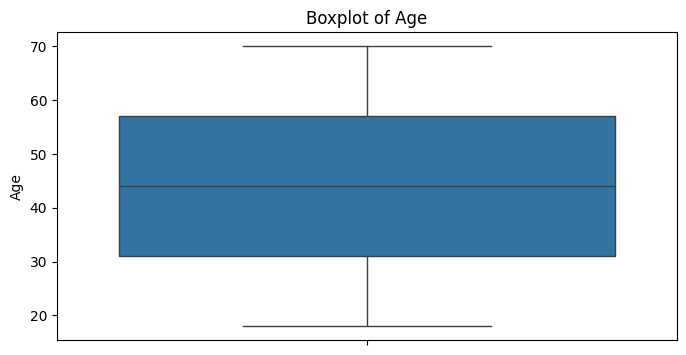

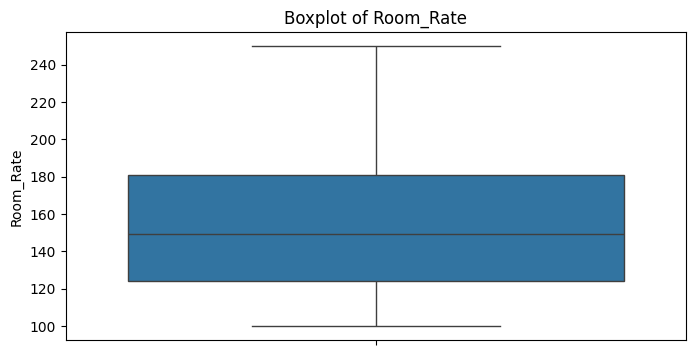

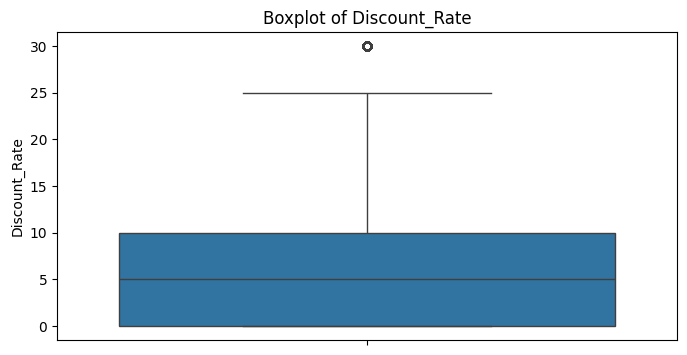

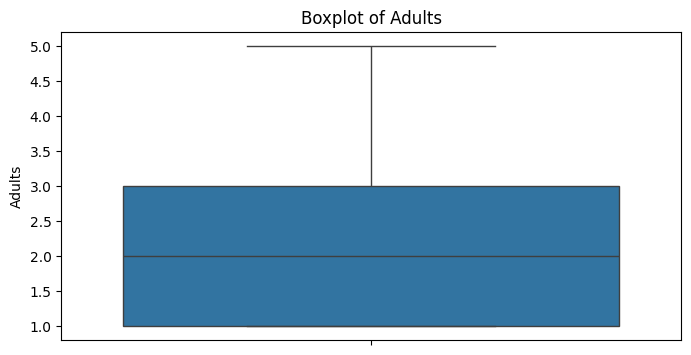

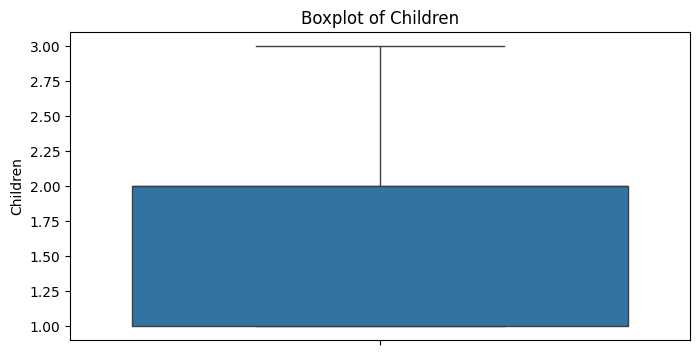

In [24]:
# Checking for outliers using boxplots
numerical_features = ['Age', 'Room_Rate', 'Discount_Rate','Adults','Children']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=train_df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [25]:
# Calculate and print outliers
for feature in numerical_features:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]
    print(f"\nOutliers in {feature}:\n", outliers[[feature]])



Outliers in Age:
 Empty DataFrame
Columns: [Age]
Index: []

Outliers in Room_Rate:
 Empty DataFrame
Columns: [Room_Rate]
Index: []

Outliers in Discount_Rate:
        Discount_Rate
60                30
91                30
137               30
203               30
204               30
...              ...
27162             30
27224             30
27323             30
27331             30
27373             30

[457 rows x 1 columns]

Outliers in Adults:
 Empty DataFrame
Columns: [Adults]
Index: []

Outliers in Children:
 Empty DataFrame
Columns: [Children]
Index: []


We checked for outliers in the features Age, Room Rate, Discount Rate, Adults, and Children. During this process, we identified outliers in the Discount Rate. However, the value of 30% and we assumed it to be a special discount rather than an outlier. Therefore, we assumed it to be valid and not an anomaly.


# Exploratory Data Analysis (EDA)

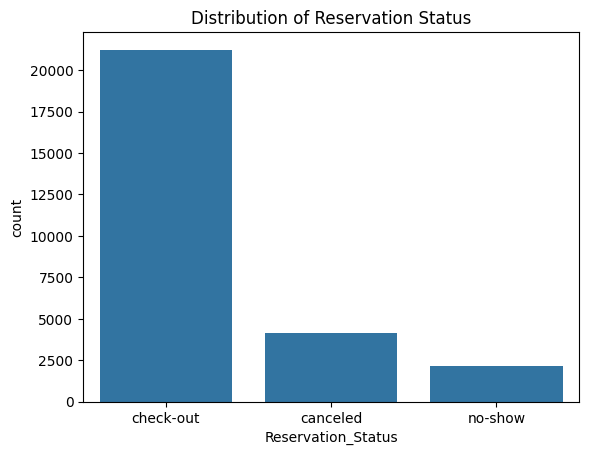

In [26]:
sns.countplot(x="Reservation_Status", data=train_df)
plt.title("Distribution of Reservation Status")
plt.show()


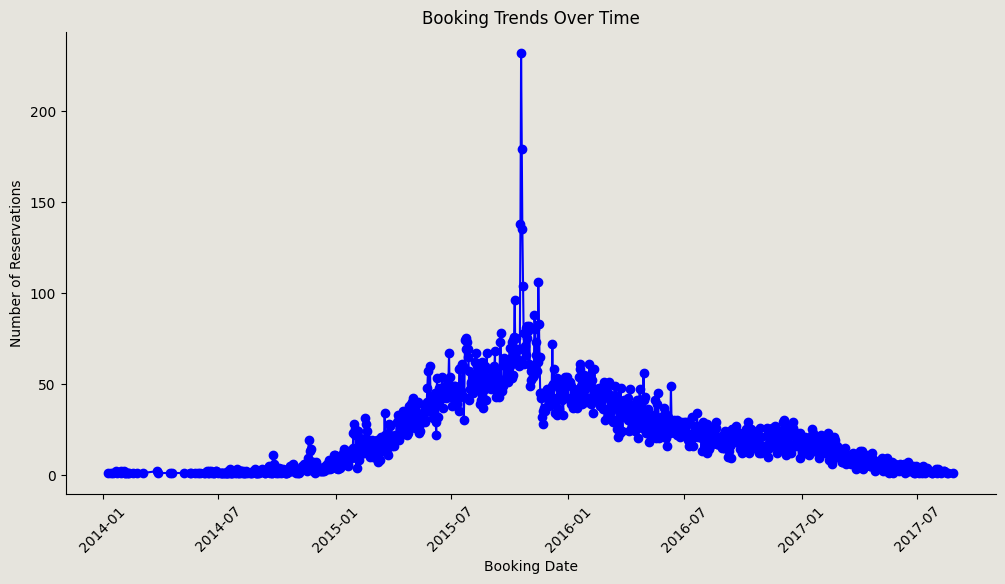

In [29]:
booking_trend = train_df["Booking_date"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(booking_trend.index, booking_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Booking Date")
plt.ylabel("Number of Reservations")
plt.title("Booking Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_19784\184099567.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




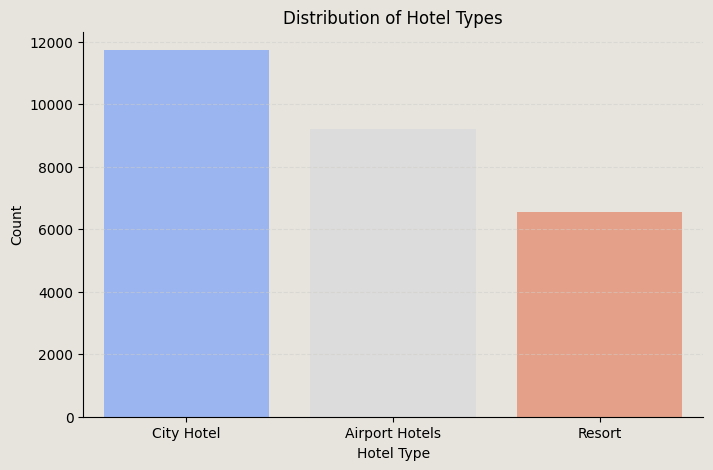

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["Hotel_Type"], palette="coolwarm")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.title("Distribution of Hotel Types")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25460\934823011.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




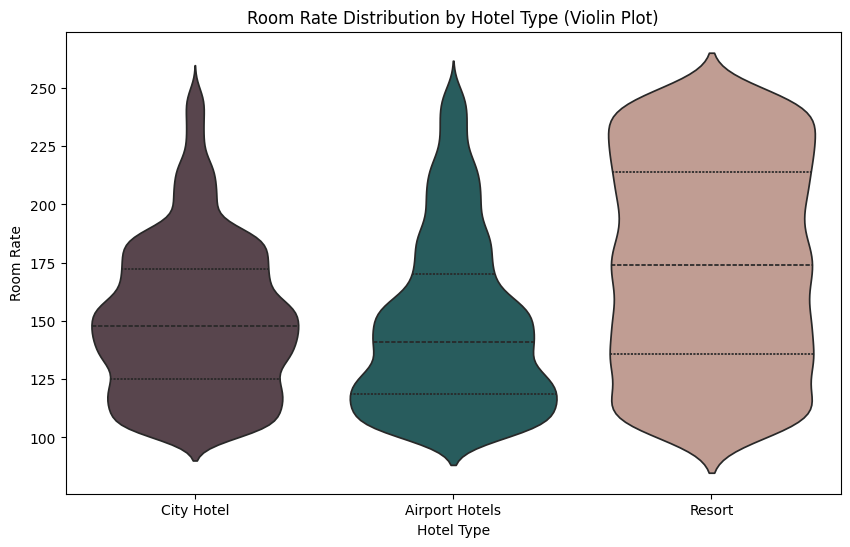

In [27]:
# Update with the actual hotel type names from your dataset
hotel_colors = {
    "City Hotel": "#5b424c",
    "Resort": "#c7998c",
    "Airport Hotels": "#1f6566"
}

plt.figure(figsize=(10, 6))
sns.violinplot(x="Hotel_Type", y="Room_Rate", data=train_df, palette=hotel_colors, inner="quartile")
plt.xlabel("Hotel Type")
plt.ylabel("Room Rate")
plt.title("Room Rate Distribution by Hotel Type (Violin Plot)")
plt.show()

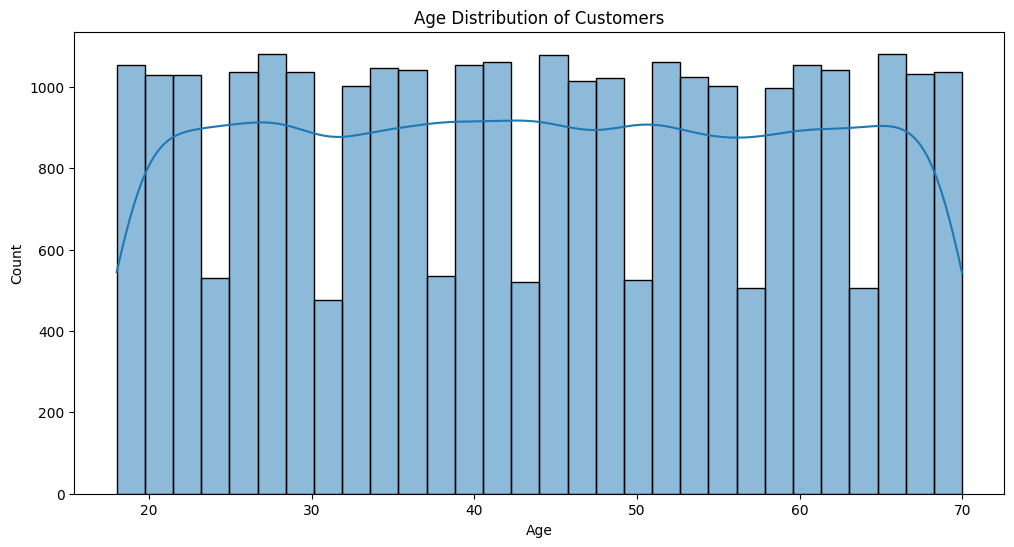

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()


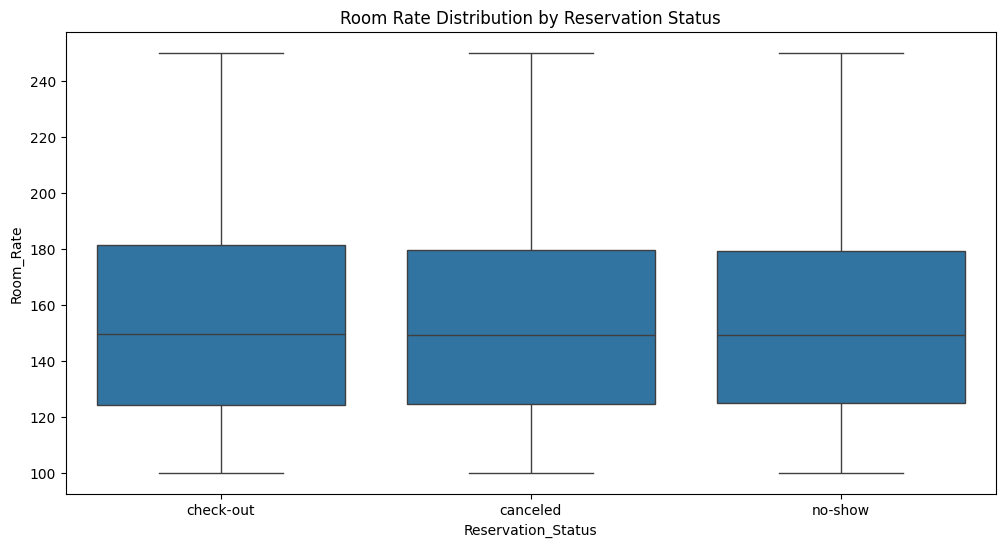

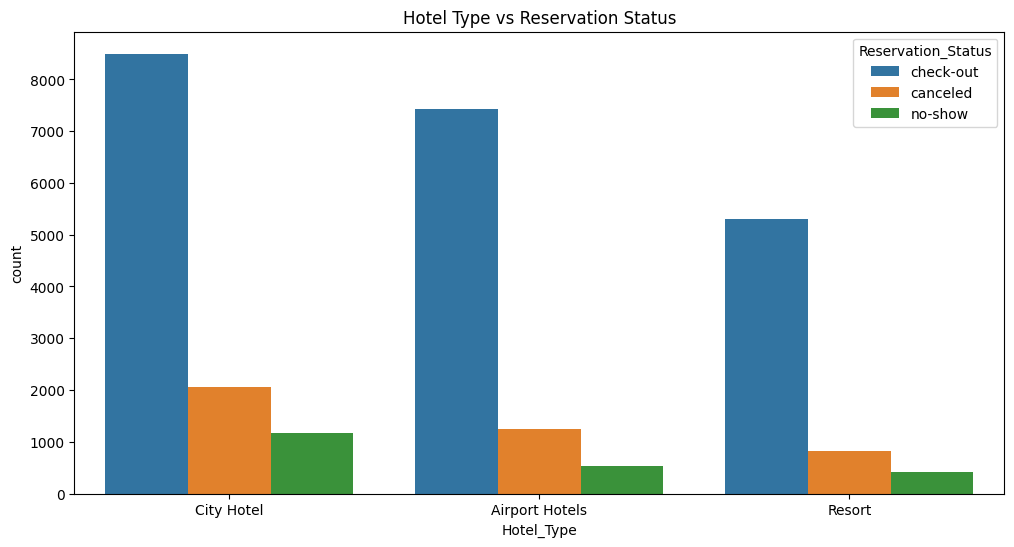

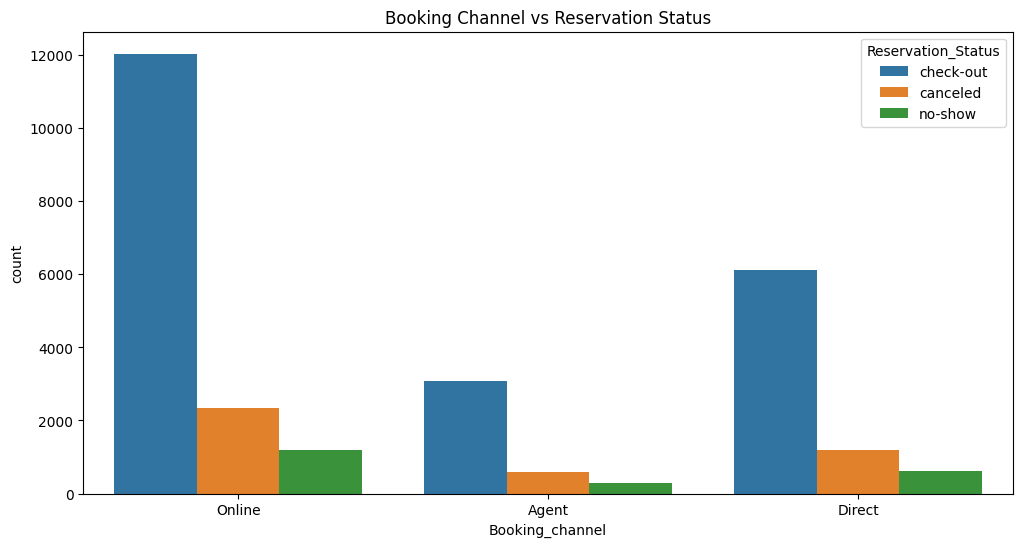

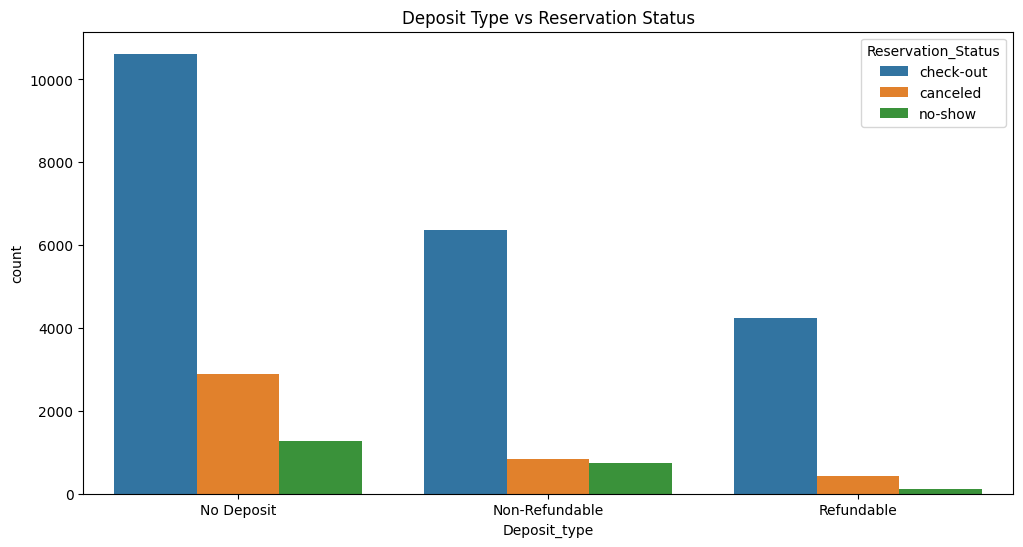

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reservation_Status', y='Room_Rate', data=train_df)
plt.title("Room Rate Distribution by Reservation Status")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Hotel_Type', hue='Reservation_Status', data=train_df)
plt.title("Hotel Type vs Reservation Status")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Booking_channel', hue='Reservation_Status', data=train_df)
plt.title("Booking Channel vs Reservation Status")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Deposit_type', hue='Reservation_Status', data=train_df)
plt.title("Deposit Type vs Reservation Status")
plt.show()


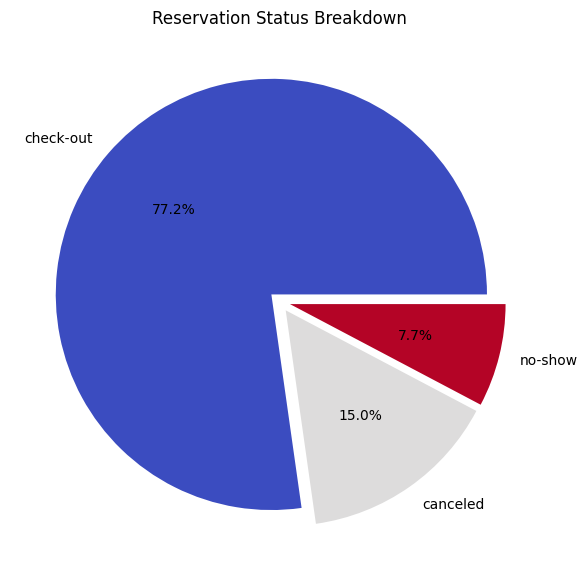

In [44]:
counts = train_df["Reservation_Status"].value_counts()

# Generate explode values dynamically (same length as unique categories)
explode = [0.05] * len(counts)

# Plot pie chart
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(7, 7),
    cmap="coolwarm",
    explode=explode
)

plt.title("Reservation Status Breakdown")
plt.ylabel("")
plt.show()


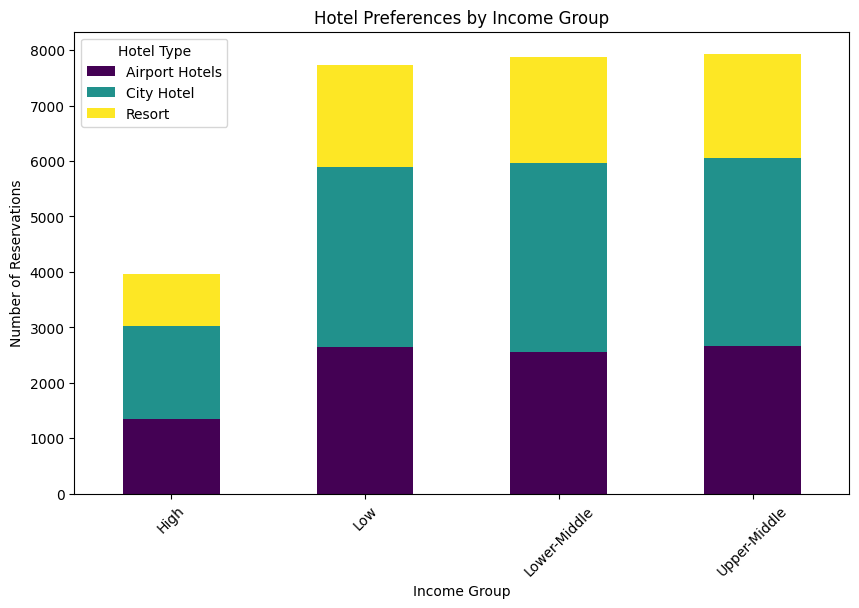

In [45]:
income_hotel = pd.crosstab(train_df["Income"], train_df["Hotel_Type"])

income_hotel.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Income Group")
plt.ylabel("Number of Reservations")
plt.title("Hotel Preferences by Income Group")
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()


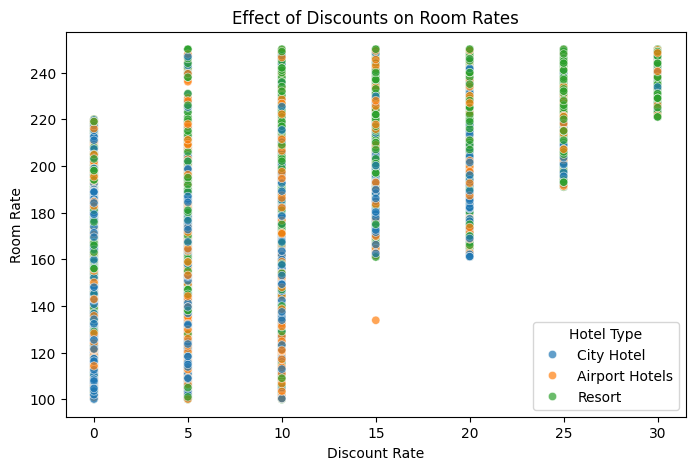

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df["Discount_Rate"], y=train_df["Room_Rate"], hue=train_df["Hotel_Type"], alpha=0.7)
plt.xlabel("Discount Rate")
plt.ylabel("Room Rate")
plt.title("Effect of Discounts on Room Rates")
plt.legend(title="Hotel Type")
plt.show()



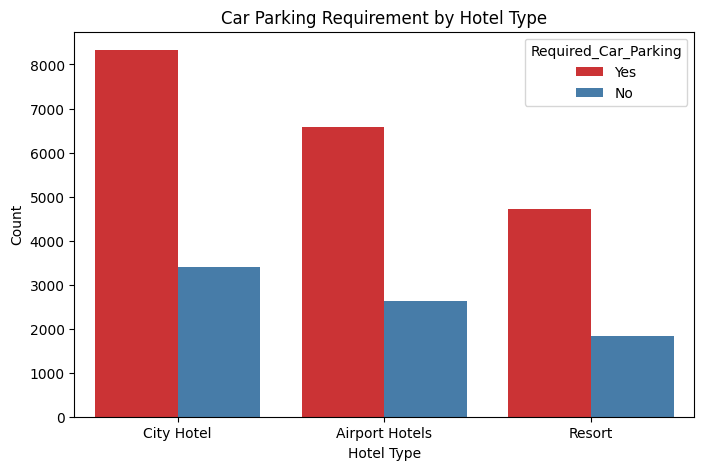

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Hotel_Type", hue="Required_Car_Parking", data=train_df, palette="Set1")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.title("Car Parking Requirement by Hotel Type")
plt.show()



# Hypothesis Testing

In [48]:
from scipy.stats import chi2_contingency, ttest_ind
# Hypothesis Testing
# 1. Does deposit type significantly affect cancellations?
contingency_table = pd.crosstab(train_df['Deposit_type'], train_df['Reservation_Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Deposit Type: p-value = {p}")


Chi-Square Test for Deposit Type: p-value = 9.604469939037889e-178


lower p value  (< 0.05) suggests that deposit type significantly influences cancellations.


In [49]:
# 2. Do online bookings have higher cancellation rates than direct bookings?
contingency_table = pd.crosstab(train_df['Booking_channel'], train_df['Reservation_Status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Booking Channel: p-value = {p}")


Chi-Square Test for Booking Channel: p-value = 0.8797156490427747


high p-value (> 0.05) would mean there is no significant difference in cancellation rates between online and direct bookings.


In [50]:
cancelled = train_df[train_df['Reservation_Status'] == 'canceled']['Room_Rate']
no_show = train_df[train_df['Reservation_Status'] == 'no-show']['Room_Rate']


In [51]:
from scipy.stats import ttest_ind
# 3. Are room rates significantly different between cancellations and no-shows?

# Drop NaN values if any
cancelled = cancelled.dropna()
no_show = no_show.dropna()

if len(cancelled) > 1 and len(no_show) > 1:
    stat, p = ttest_ind(cancelled, no_show, nan_policy='omit')
    print(f"T-Test for Room Rate between Cancellations and No-Shows: p-value = {p}")
else:
    print("Not enough valid data for T-test.")


T-Test for Room Rate between Cancellations and No-Shows: p-value = 0.7929441638099711


high p-value (> 0.05) would mean there is no significant difference in cancellation rates  and no-shows.


# Key factors leading to booking cancellations and no-shows

['check-out' 'canceled' 'no-show']


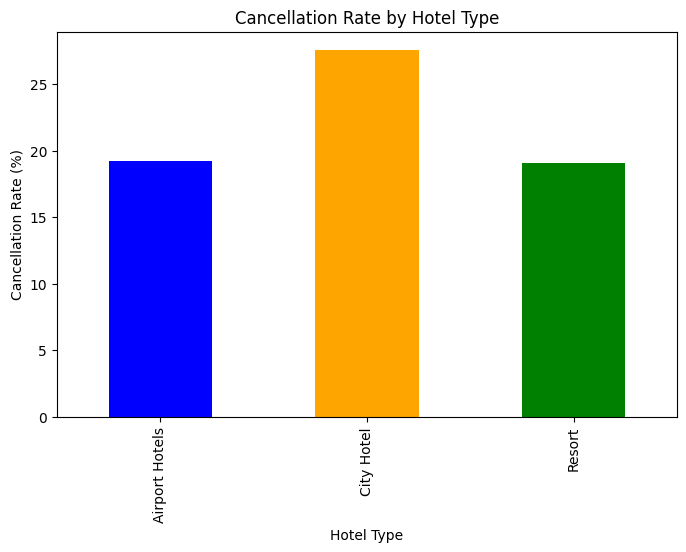

In [52]:
# Check unique values in Reservation_Status
print(train_df["Reservation_Status"].unique())

# Calculate cancellation rate by hotel type
cancel_rate = train_df.groupby("Hotel_Type")["Reservation_Status"].apply(lambda x: (x.isin(['canceled', 'no-show']).mean()) * 100)

plt.figure(figsize=(8,5))
cancel_rate.plot(kind="bar", color=["blue", "orange", "green"])
plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Hotel Type")
plt.show()


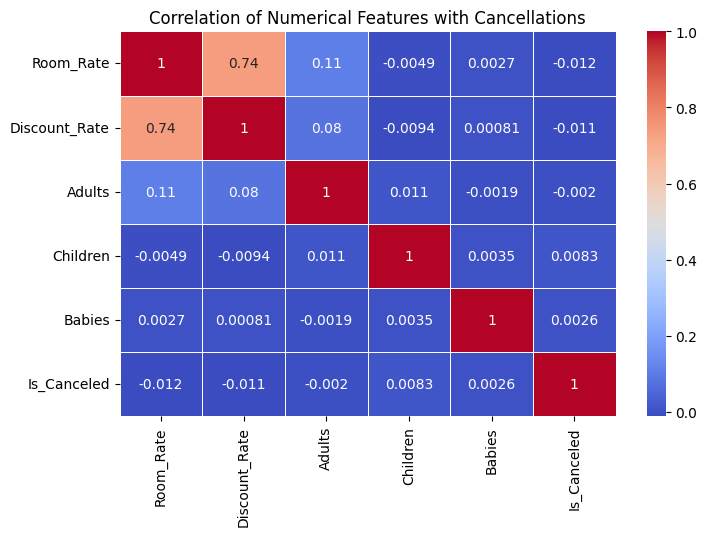

In [53]:
train_df["Is_Canceled"] = train_df["Reservation_Status"].apply(lambda x: 1 if x in ["canceled", "no-show"] else 0)

# Correlation with numerical variables
num_features = ["Room_Rate", "Discount_Rate", "Adults", "Children", "Babies"]  # Add more if needed
corr_matrix = train_df[num_features + ["Is_Canceled"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Numerical Features with Cancellations")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




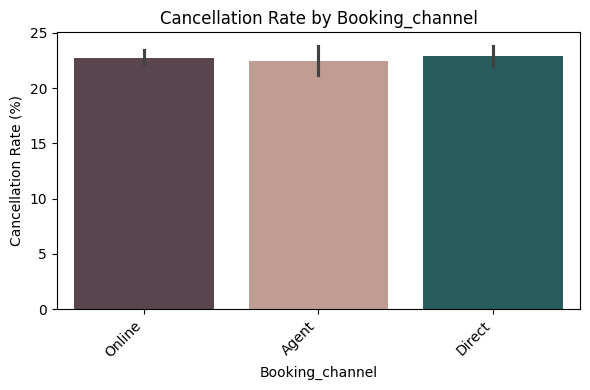

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




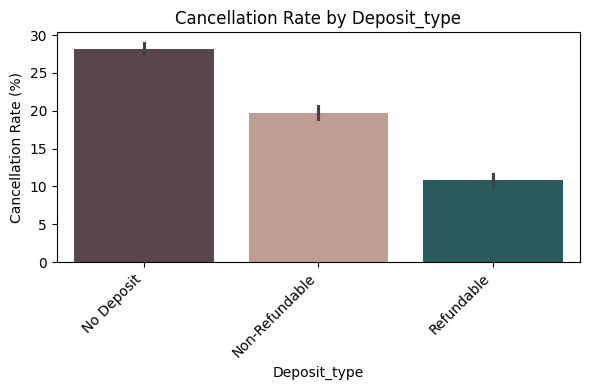

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




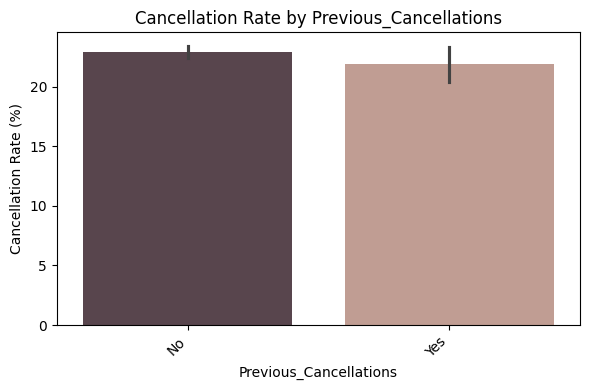

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




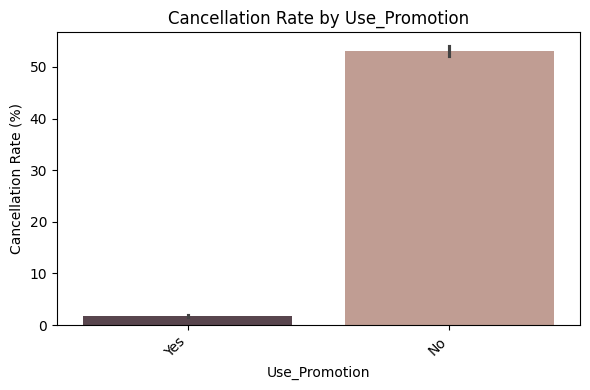

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




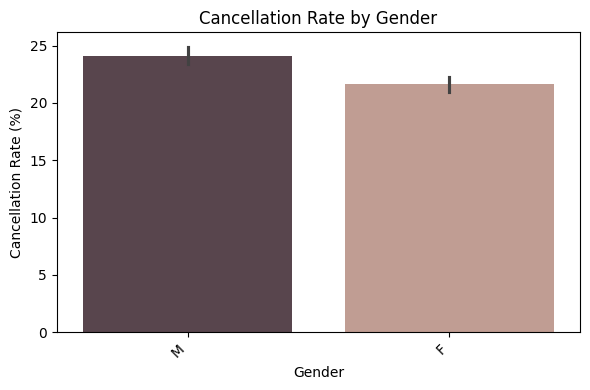

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




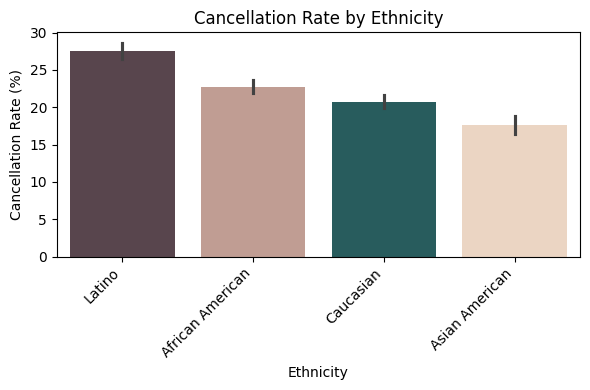

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




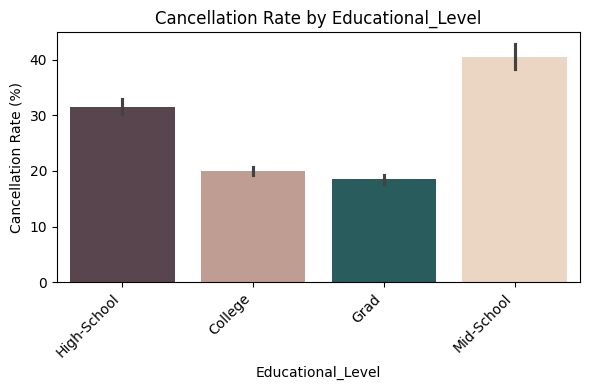

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




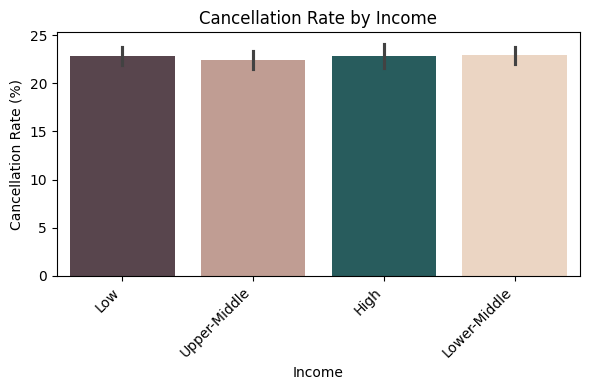

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




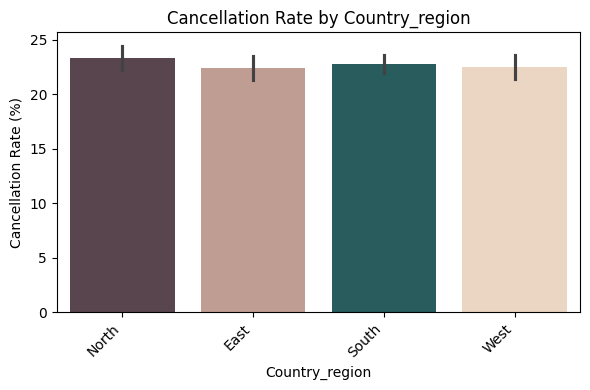

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




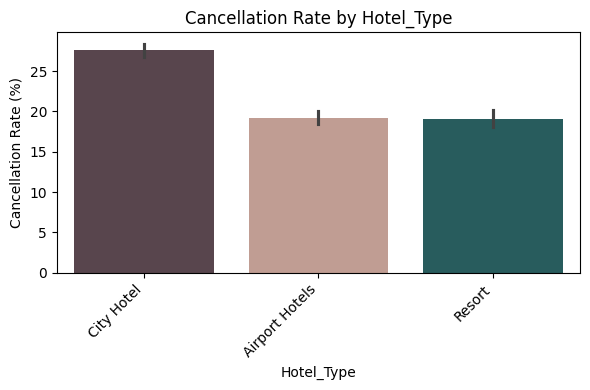

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




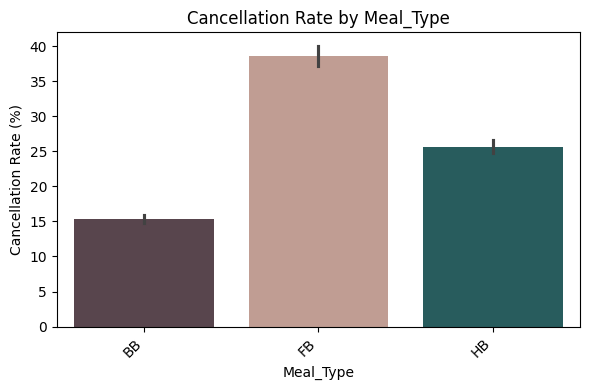

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




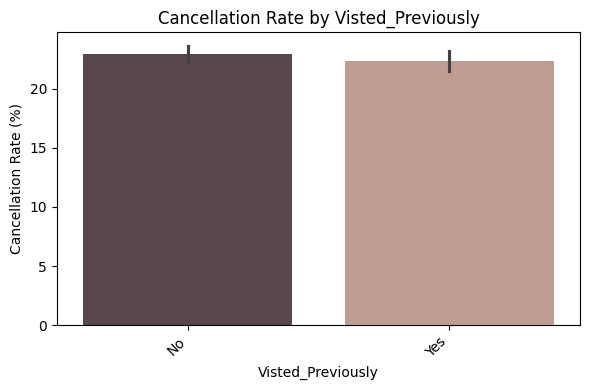

C:\Users\User\AppData\Local\Temp\ipykernel_25460\1631458734.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




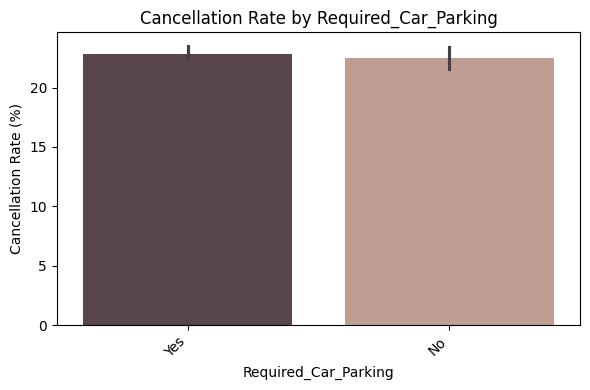

In [54]:
# Define your custom colors
custom_colors = ['#5b424c', '#c7998c', '#1f6566', '#f2d4bc', '#253140', '#1f1b17', '#011c50', '#000000']

# Cancellation rate by categorical features
categorical_features = ["Booking_channel", "Deposit_type", "Previous_Cancellations", "Use_Promotion", "Gender", "Ethnicity", "Educational_Level", "Income", "Country_region", "Hotel_Type", "Meal_Type", "Visted_Previously", "Required_Car_Parking"]

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    
    # Get unique categories for this feature
    categories = train_df[feature].unique()
    n_categories = len(categories)
    
    # Create a color palette for this feature
    # If more categories than colors, colors will cycle
    feature_colors = custom_colors[:n_categories] if n_categories <= len(custom_colors) else custom_colors
    
    # Create the plot
    sns.barplot(x=feature, y="Is_Canceled", data=train_df, estimator=lambda x: x.mean() * 100, palette=feature_colors)
    
    plt.xlabel(feature)
    plt.ylabel("Cancellation Rate (%)")
    plt.title(f"Cancellation Rate by {feature}")
    plt.xticks(rotation=45, ha='right')  # Improved readability with 45 deg rotation
    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.show()

In [44]:
# Filter data for cancellations and no-shows
canceled_noshow_df = train_df[train_df['Reservation_Status'].isin(['canceled', 'no-show'])]



Demographic Features


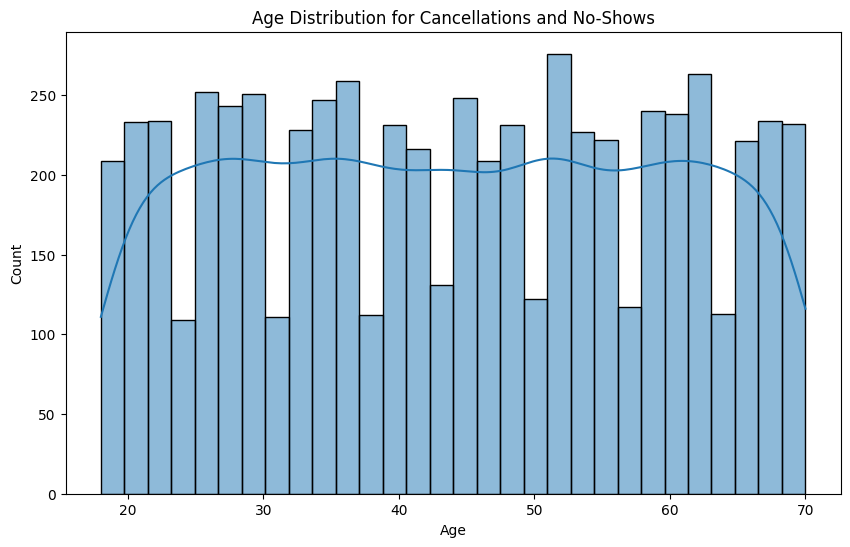

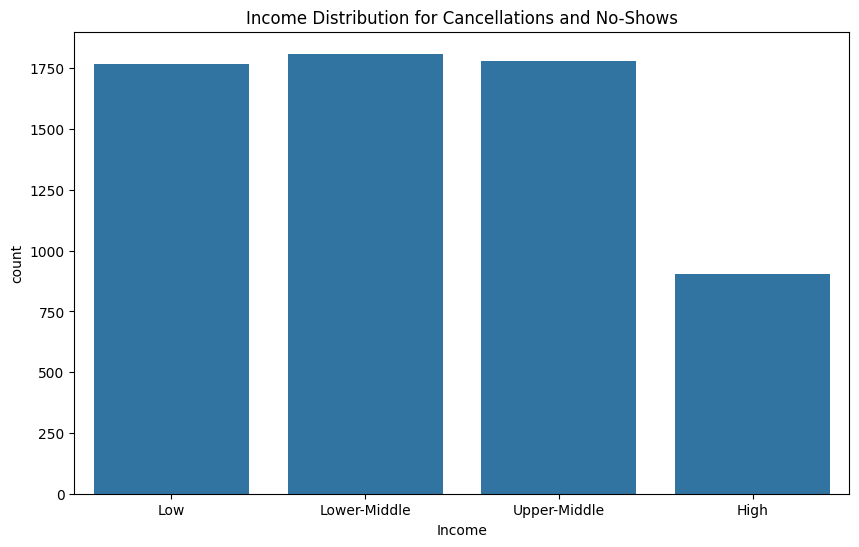

In [45]:
# Analyze Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(canceled_noshow_df['Age'], bins=30, kde=True)
plt.title("Age Distribution for Cancellations and No-Shows")
plt.show()

# Analyze Income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income', data=canceled_noshow_df, order=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
plt.title("Income Distribution for Cancellations and No-Shows")
plt.show()


# Revenue loss due to cancellations and no-show

In [46]:
# Total revenue loss due to cancellations and no-shows
total_loss = train_df.loc[train_df["Is_Canceled"] == 1, "Room_Rate"].sum()

print(f"Total Revenue Loss Due to Cancellations and No-Shows: ${total_loss:,.2f}")




Total Revenue Loss Due to Cancellations and No-Shows: $968,841.43


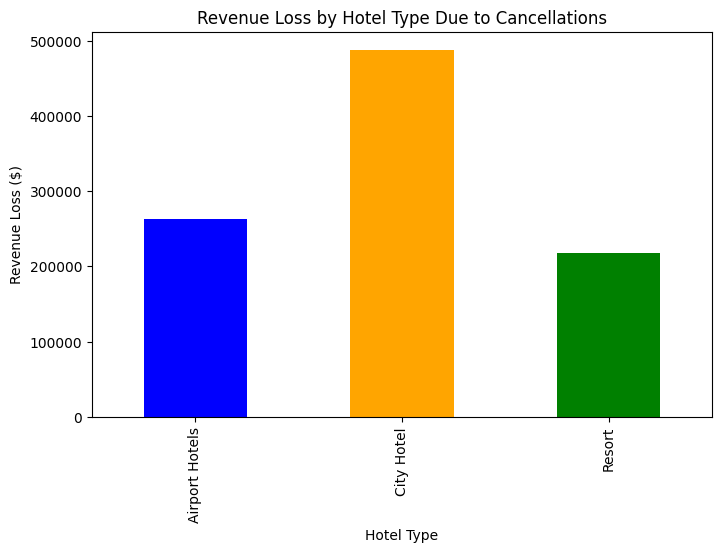

In [47]:
loss_by_hotel = train_df.loc[train_df["Is_Canceled"] == 1].groupby("Hotel_Type")["Room_Rate"].sum()

# Plot
plt.figure(figsize=(8, 5))
loss_by_hotel.plot(kind="bar", color=["blue", "orange", "green"])
plt.xlabel("Hotel Type")
plt.ylabel("Revenue Loss ($)")
plt.title("Revenue Loss by Hotel Type Due to Cancellations")
plt.show()


# Feature Engineering

### Additional Date-Based Operations

Calculate the length of stay

In [48]:
train_df['Length_of_Stay'] = (train_df['Expected_checkout'] - train_df['Expected_checkin']).dt.days

Extract year, month, or day

In [49]:
train_df['Checkin_Year'] = train_df['Expected_checkin'].dt.year
train_df['Checkin_Month'] =train_df['Expected_checkin'].dt.month
train_df['Checkin_Day'] =train_df['Expected_checkin'].dt.day

Check if booking was made in advance

In [50]:
train_df['Advance_Booking_Days'] = (train_df['Expected_checkin'] - train_df['Booking_date']).dt.days

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Reservation-id          27499 non-null  int64         
 1   Gender                  27499 non-null  object        
 2   Age                     27499 non-null  int64         
 3   Ethnicity               27499 non-null  object        
 4   Educational_Level       27499 non-null  object        
 5   Income                  27499 non-null  object        
 6   Country_region          27499 non-null  object        
 7   Hotel_Type              27499 non-null  object        
 8   Expected_checkin        27499 non-null  datetime64[ns]
 9   Expected_checkout       27499 non-null  datetime64[ns]
 10  Booking_date            27499 non-null  datetime64[ns]
 11  Adults                  27499 non-null  int64         
 12  Children                27499 non-null  int64 

In [52]:
# List of datetime columns to drop
datetime_columns = ['Expected_checkin', 'Expected_checkout', 'Booking_date']

# Drop datetime columns
train_df = train_df.drop(columns=datetime_columns)

# Display the updated dataframe
print(train_df.head())


   Reservation-id Gender  Age         Ethnicity Educational_Level  \
0        39428300      M   40            Latino       High-School   
1        77491756      F   49  African American       High-School   
2        73747291      F   42         Caucasian           College   
3        67301739      M   25            Latino       High-School   
4        77222321      F   62  African American              Grad   

         Income Country_region      Hotel_Type  Adults  Children  ...  \
0           Low          North      City Hotel       4         2  ...   
1  Upper-Middle           East  Airport Hotels       1         3  ...   
2           Low           East  Airport Hotels       1         3  ...   
3          High          South      City Hotel       3         3  ...   
4  Lower-Middle           East  Airport Hotels       1         1  ...   

   Reservation_Status Use_Promotion Discount_Rate   Room_Rate Is_Canceled  \
0           check-out           Yes             0  106.440241        

In [53]:
train_df = train_df.drop(columns='Is_Canceled')

## Cleaning the validation dataset




In [54]:
validation_df.isnull().sum()

Reservation-id              0
Gender                      0
Age                         0
Ethnicity                   0
Educational_Level           0
Income                      0
Country_region              0
Hotel_Type                  0
Expected_checkin            0
Expected_checkout           0
Booking_date                0
Adults                      0
Children                    0
Babies                    412
Meal_Type                   0
Visted_Previously           0
Previous_Cancellations      0
Deposit_type                0
Booking_channel             0
Required_Car_Parking        0
Reservation_Status          0
Use_Promotion               0
Discount_Rate               0
Room_Rate                   0
dtype: int64

In [55]:
validation_df['Babies'] = validation_df['Babies'].fillna(0).astype(int)


In [56]:
validation_df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [57]:
# Convert 'Expected_checkin', 'Expected_checkout', and 'Booking_date' to datetim
validation_df['Expected_checkin'] = pd.to_datetime(validation_df['Expected_checkin'])
validation_df['Expected_checkout'] = pd.to_datetime(validation_df['Expected_checkout'])
validation_df['Booking_date'] = pd.to_datetime(validation_df['Booking_date'])

# Verify the conversion
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Reservation-id          2749 non-null   int64         
 1   Gender                  2749 non-null   object        
 2   Age                     2749 non-null   int64         
 3   Ethnicity               2749 non-null   object        
 4   Educational_Level       2749 non-null   object        
 5   Income                  2749 non-null   object        
 6   Country_region          2749 non-null   object        
 7   Hotel_Type              2749 non-null   object        
 8   Expected_checkin        2749 non-null   datetime64[ns]
 9   Expected_checkout       2749 non-null   datetime64[ns]
 10  Booking_date            2749 non-null   datetime64[ns]
 11  Adults                  2749 non-null   int64         
 12  Children                2749 non-null   int64   

In [58]:
# Standardizing Ethnicity (Capitalization)
validation_df['Ethnicity'] = validation_df['Ethnicity'].replace({'caucasian': 'Caucasian'})

In [59]:
# Check unique values in the 'Ethnicity' column
print("Ethnicity:", validation_df['Ethnicity'].unique())

Ethnicity: ['Latino' 'Caucasian' 'Asian American' 'African American']


In [60]:
# Define a mapping dictionary for income categories
income_mapping = {
    '<25K': 'Low',
    '25K --50K': 'Lower-Middle',
    '50K -- 100K': 'Upper-Middle',
    '>100K': 'High'
}


# Apply the mapping to the 'Income' column
validation_df['Income'] = validation_df['Income'].map(income_mapping)


# Verify the changes
print("Income Categories after Mapping:", validation_df['Income'].unique())

Income Categories after Mapping: ['Low' 'Lower-Middle' 'Upper-Middle' 'High']


In [61]:
# Check for duplicate rows
print("Number of duplicate rows:", validation_df.duplicated().sum())

Number of duplicate rows: 0


In [62]:
validation_df['Length_of_Stay'] = (validation_df['Expected_checkout'] - validation_df['Expected_checkin']).dt.days

In [63]:
validation_df['Checkin_Year'] = validation_df['Expected_checkin'].dt.year
validation_df['Checkin_Month'] =validation_df['Expected_checkin'].dt.month
validation_df['Checkin_Day'] =validation_df['Expected_checkin'].dt.day


In [64]:
validation_df['Advance_Booking_Days'] = (validation_df['Expected_checkin'] - validation_df['Booking_date']).dt.days

In [65]:
# List of datetime columns to drop
datetime_columns = ['Expected_checkin', 'Expected_checkout', 'Booking_date']

# Drop datetime columns
validation_df = validation_df.drop(columns=datetime_columns)

# Display the updated dataframe
print(validation_df.head())


   Reservation-id Gender  Age       Ethnicity Educational_Level        Income  \
0        45716350      M   56          Latino           College           Low   
1        88857401      M   60       Caucasian        Mid-School  Lower-Middle   
2        16074440      F   58  Asian American       High-School           Low   
3        10992124      F   23       Caucasian       High-School  Lower-Middle   
4        15934351      F   47  Asian American           College  Lower-Middle   

  Country_region      Hotel_Type  Adults  Children  ...  Required_Car_Parking  \
0           West      City Hotel       2         2  ...                    No   
1           West      City Hotel       2         2  ...                   Yes   
2          North          Resort       4         1  ...                    No   
3           East  Airport Hotels       2         2  ...                    No   
4          South          Resort       2         1  ...                   Yes   

  Reservation_Status Use_P

# Handling Inconsistencies in Reservation Status and Encoding for Model Training

In [66]:
# Check unique values in the 'Reservation_Status' column (target variable)
print("Reservation_Status:", validation_df['Reservation_Status'].unique())

# Check unique values in the 'Gender' column
print("Gender:", validation_df['Gender'].unique())

# Check unique values in the 'Ethnicity' column
print("Ethnicity:", validation_df['Ethnicity'].unique())

# Check unique values in the 'Educational_Level' column
print("Educational_Level:", validation_df['Educational_Level'].unique())

# Check unique values in the 'Income' column
print("Income:", validation_df['Income'].unique())

# Check unique values in the 'Country_region' column
print("Country_region:", validation_df['Country_region'].unique())

# Check unique values in the 'Hotel_Type' column
print("Hotel_Type:", validation_df['Hotel_Type'].unique())

# Check unique values in the 'Meal_Type' column
print("Meal_Type:", validation_df['Meal_Type'].unique())

# Check unique values in the 'Visted_Previously' column
print("Visted_Previously:", validation_df['Visted_Previously'].unique())

# Check unique values in the 'Previous_Cancellations' column
print("Previous_Cancellations:", validation_df['Previous_Cancellations'].unique())

# Check unique values in the 'Deposit_type' column
print("Deposit_type:", validation_df['Deposit_type'].unique())

# Check unique values in the 'Booking_channel' column
print("Booking_channel:", validation_df['Booking_channel'].unique())

# Check unique values in the 'Required_Car_Parking' column
print("Required_Car_Parking:", validation_df['Required_Car_Parking'].unique())

# Check unique values in the 'Use_Promotion' column
print("Use_Promotion:", validation_df['Use_Promotion'].unique())


Reservation_Status: ['no-show' 'canceled' 'check-in']
Gender: ['M' 'F']
Ethnicity: ['Latino' 'Caucasian' 'Asian American' 'African American']
Educational_Level: ['College' 'Mid-School' 'High-School' 'Grad']
Income: ['Low' 'Lower-Middle' 'Upper-Middle' 'High']
Country_region: ['West' 'North' 'East' 'South']
Hotel_Type: ['City Hotel' 'Resort' 'Airport Hotels']
Meal_Type: ['HB' 'FB' 'BB']
Visted_Previously: ['No' 'Yes']
Previous_Cancellations: ['No' 'Yes']
Deposit_type: ['No Deposit' 'Non-Refundable' 'Refundable']
Booking_channel: ['Agent' 'Online' 'Direct']
Required_Car_Parking: ['No' 'Yes']
Use_Promotion: ['No' 'Yes']


we found that check out in train_df but in validation dataset there is check_out

# Encoding Categorical and Binary Variables for Model Training

In [67]:
# Binary encoding for Yes/No features
binary_cols = ["Visted_Previously", "Previous_Cancellations", "Required_Car_Parking", "Use_Promotion"]

for col in binary_cols:
    train_df[col] = train_df[col].map({"Yes": 1, "No": 0})
    validation_df[col] = validation_df[col].map({"Yes": 1, "No": 0})  # Apply same encoding to validation data



In [68]:
status_mapping = {"check-in": 0, "canceled": 1, "no-show": 2}
validation_df["Reservation_Status"] = validation_df["Reservation_Status"].map(status_mapping)


In [69]:
# Encoding Reservation_Status
status_mapping = {"check-out": 0, "canceled": 1, "no-show": 2}
train_df["Reservation_Status"] = train_df["Reservation_Status"].map(status_mapping)




In the training dataset, the target variable (Y) includes only "Check-Out," "Canceled," and "No-Show." However, in the validation dataset, it includes "Check-In," "Canceled," and "No-Show." Since "Check-In" is not present in the training data, we cannot predict it in the validation data. Therefore, we rename the "Check-In" category in the validation dataset to "Check-Out.


In [70]:
one_hot_cols = ["Booking_channel", "Deposit_type", "Meal_Type", "Country_region",
                "Ethnicity", "Educational_Level", "Income", "Hotel_Type", "Gender"]

# Apply one-hot encoding
train_df = pd.get_dummies(train_df, columns=one_hot_cols, drop_first=True)
validation_df = pd.get_dummies(validation_df, columns=one_hot_cols, drop_first=True)  # Apply to validation data




# Building a predictive model to classify a booking as Cancellation; No-Show and Check-In

# Defining Features and Target Variable for Model Training

In [71]:
# Define features and target variable
X_train = train_df.drop(columns=["Reservation_Status"])
y_train = train_df["Reservation_Status"]

X_valid = validation_df.drop(columns=["Reservation_Status"])
y_valid = validation_df["Reservation_Status"]


# Training and Evaluating Machine Learning Models

In [72]:
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier()
}

# Train and evaluate models
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_valid)  # Predict on validation set

    # Classification Metrics
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_valid, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_valid, y_pred, average="weighted")


    # Store metrics
    model_scores[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # Print metrics
    print(f"\n{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")



Logistic Regression Performance:
  Accuracy: 0.5857
  Precision: 0.3430
  Recall: 0.5857
  F1-score: 0.4326

Random Forest Performance:
  Accuracy: 0.6668
  Precision: 0.6417
  Recall: 0.6668
  F1-score: 0.6034

XGBoost Performance:
  Accuracy: 0.6770
  Precision: 0.6624
  Recall: 0.6770
  F1-score: 0.6293
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 27499, number of used features: 37
[LightGBM] [Info] Start training from score -0.258263
[LightGBM] [Info] Start training from score -1.894904
[LightGBM] [Info] Start training from score -2.560378

LightGBM Performance:
  Accuracy: 0.6861
  Precision: 0.6753
  Recall: 0.6861
  F1-score: 0.6406


The LightGBM model is the best choice for predicting cancellations and no-shows. Its high accuracy and F1-score ensure better revenue management and operational efficiency. Implementing this predictive analytics solution can significantly reduce revenue loss and enhance guest satisfaction. 


# Customer Segmentation and Reservation Prediction Using K-Means Clustering and Random Forest

In [73]:
# Display all column names in the dataset
print("Feature list in train dataset:\n", train_df.columns.tolist())
print("\nFeature list in validation dataset:\n", validation_df.columns.tolist())

Feature list in train dataset:
 ['Reservation-id', 'Age', 'Adults', 'Children', 'Babies', 'Visted_Previously', 'Previous_Cancellations', 'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Length_of_Stay', 'Checkin_Year', 'Checkin_Month', 'Checkin_Day', 'Advance_Booking_Days', 'Booking_channel_Direct', 'Booking_channel_Online', 'Deposit_type_Non-Refundable', 'Deposit_type_Refundable', 'Meal_Type_FB', 'Meal_Type_HB', 'Country_region_North', 'Country_region_South', 'Country_region_West', 'Ethnicity_Asian American', 'Ethnicity_Caucasian', 'Ethnicity_Latino', 'Educational_Level_Grad', 'Educational_Level_High-School', 'Educational_Level_Mid-School', 'Income_Low', 'Income_Lower-Middle', 'Income_Upper-Middle', 'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Gender_M']

Feature list in validation dataset:
 ['Reservation-id', 'Age', 'Adults', 'Children', 'Babies', 'Visted_Previously', 'Previous_Cancellations', 'Required_Car_Parking', 'Reservation_Status'

In [74]:
# Select relevant features
features = [
    "Age", "Gender_M", "Ethnicity_Asian American", "Ethnicity_Caucasian", "Ethnicity_Latino",
    "Educational_Level_Grad", "Educational_Level_High-School", "Educational_Level_Mid-School",
    "Income_Low", "Income_Lower-Middle", "Income_Upper-Middle",
    "Visted_Previously", "Previous_Cancellations", "Advance_Booking_Days",
    "Required_Car_Parking", "Use_Promotion", "Booking_channel_Direct", "Booking_channel_Online",
    "Deposit_type_Non-Refundable", "Deposit_type_Refundable",
    "Discount_Rate", "Room_Rate", "Length_of_Stay",
    "Hotel_Type_City Hotel", "Hotel_Type_Resort",
    "Country_region_North", "Country_region_South", "Country_region_West"
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
train_df["Customer_Segment"] = kmeans.fit_predict(X_train_scaled)
validation_df["Customer_Segment"] = kmeans.predict(X_valid_scaled)  # Apply clustering to validation data

# Train a classification model
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict and evaluate on test set
y_pred_train = clf.predict(X_test_clf)
train_accuracy = accuracy_score(y_test_clf, y_pred_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print("\nTraining Classification Report:\n", classification_report(y_test_clf, y_pred_train))

# Predict and evaluate on validation set
y_pred_valid = clf.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print(f"\nValidation Accuracy: {valid_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_valid, y_pred_valid))

# Display customer segment distribution
print("\nCustomer Segment Distribution (Train):\n", train_df["Customer_Segment"].value_counts())
print("\nCustomer Segment Distribution (Validation):\n", validation_df["Customer_Segment"].value_counts())

Training Accuracy: 0.8311

Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4267
           1       0.59      0.50      0.54       810
           2       0.63      0.26      0.37       423

    accuracy                           0.83      5500
   macro avg       0.70      0.57      0.61      5500
weighted avg       0.81      0.83      0.81      5500


Validation Accuracy: 0.6704

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80      1610
           1       0.66      0.35      0.46       741
           2       0.46      0.08      0.14       398

    accuracy                           0.67      2749
   macro avg       0.60      0.47      0.47      2749
weighted avg       0.64      0.67      0.61      2749


Customer Segment Distribution (Train):
 Customer_Segment
1    12791
0     7907
2     6801
Name: count, dtype: in


Training Random Forest for Feature Importance Analysis...
Random Forest Accuracy: 0.6668
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      1610
           1       0.70      0.33      0.45       741
           2       0.42      0.08      0.13       398

    accuracy                           0.67      2749
   macro avg       0.60      0.46      0.46      2749
weighted avg       0.64      0.67      0.60      2749



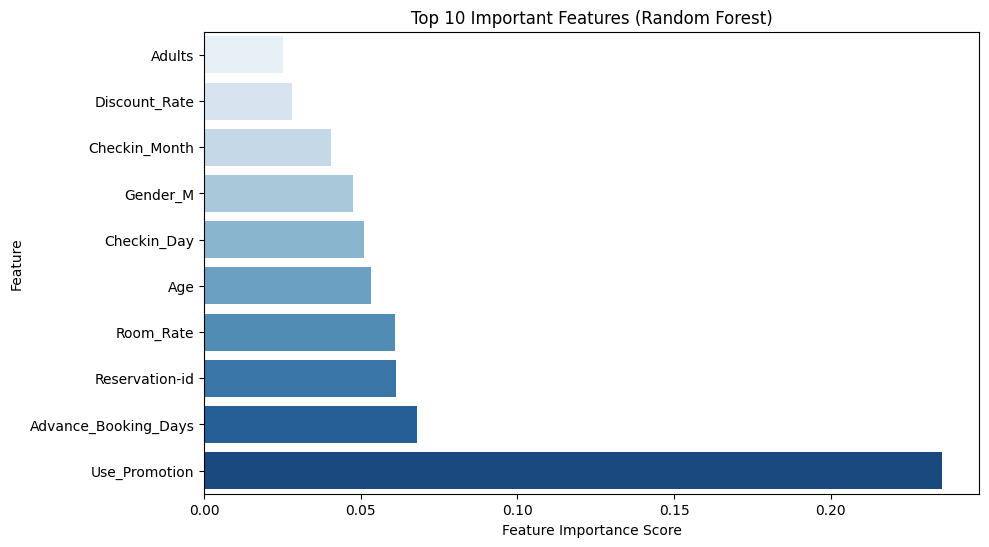


Training Gradient Boosting (GBM) for Feature Importance Analysis...
Gradient Boosting (GBM) Accuracy: 0.6759
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      1610
           1       0.74      0.32      0.44       741
           2       0.46      0.19      0.27       398

    accuracy                           0.68      2749
   macro avg       0.63      0.49      0.50      2749
weighted avg       0.67      0.68      0.63      2749



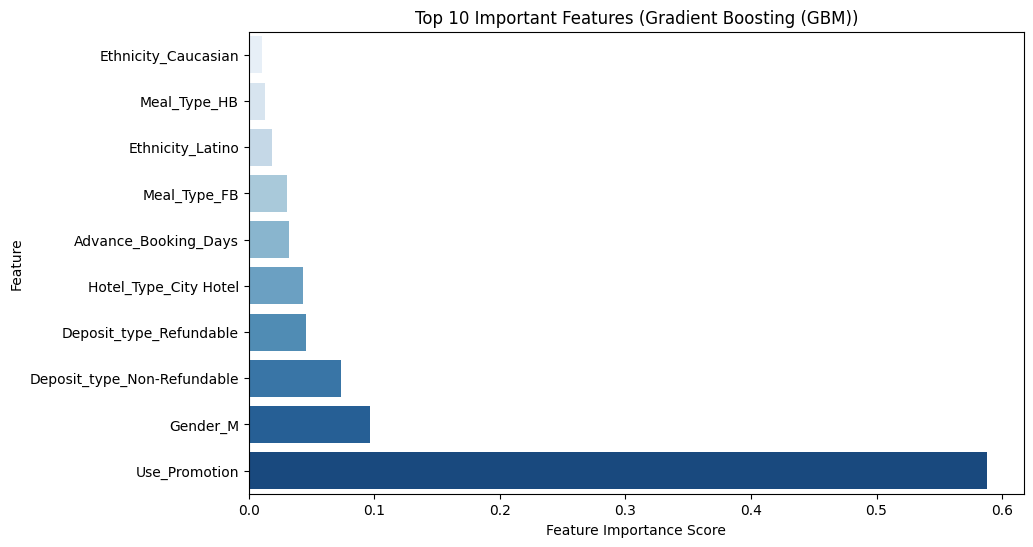


Training AdaBoost for Feature Importance Analysis...
AdaBoost Accuracy: 0.6628
              precision    recall  f1-score   support

           0       0.67      0.97      0.80      1610
           1       0.63      0.32      0.42       741
           2       0.44      0.07      0.12       398

    accuracy                           0.66      2749
   macro avg       0.58      0.45      0.44      2749
weighted avg       0.63      0.66      0.60      2749



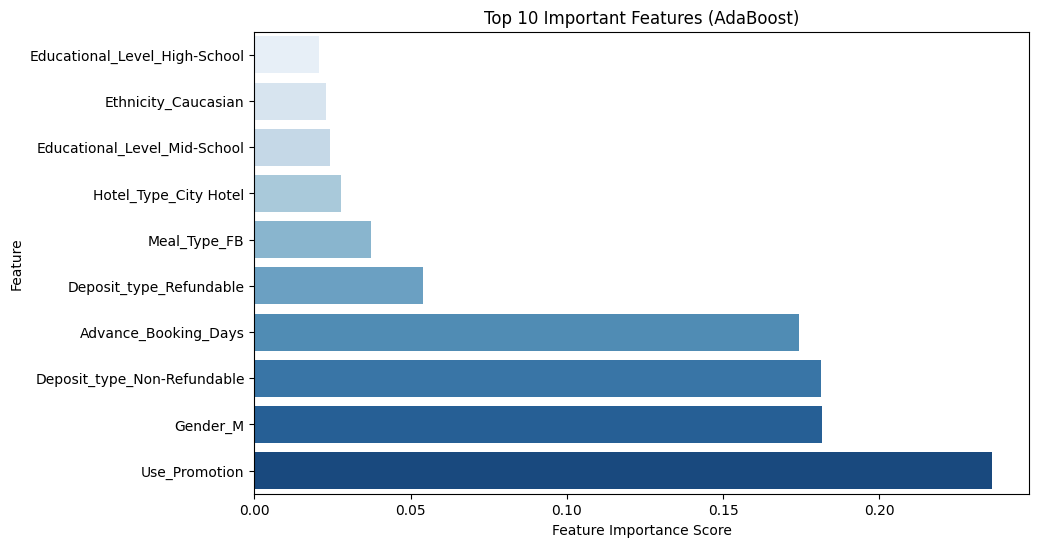


Training LightGBM for Feature Importance Analysis...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 27499, number of used features: 37
[LightGBM] [Info] Start training from score -0.258263
[LightGBM] [Info] Start training from score -1.894904
[LightGBM] [Info] Start training from score -2.560378
LightGBM Accuracy: 0.6861
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      1610
           1       0.72      0.35      0.47       741
           2       0.53      0.21      0.30       398

    accuracy                           0.69      2749
   macro avg       0.65      0.51      0.52      2749
weighted avg       0.68      0.69      0.64      2749



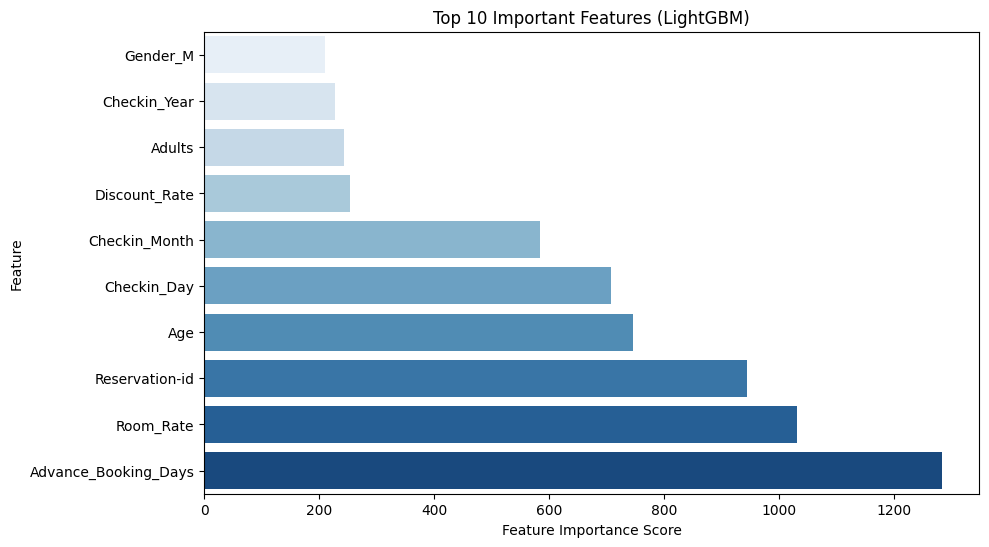

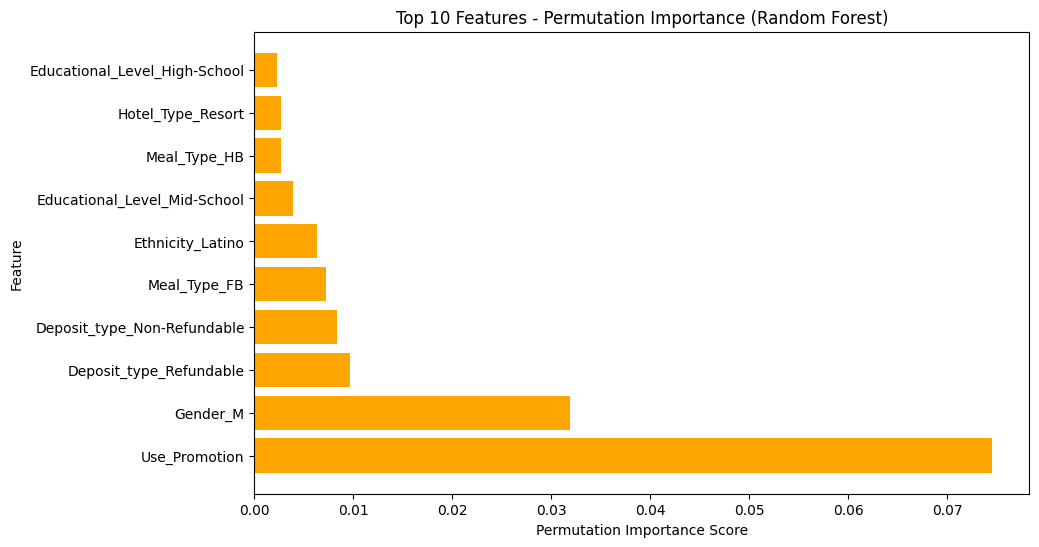

In [75]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (GBM)": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store feature importance results
feature_importance_results = {}

for name, model in models.items():
    print(f"\nTraining {name} for Feature Importance Analysis...")
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred_valid)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_valid, y_pred_valid))

    # Check if model supports feature_importances_
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
        feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

        # Store results
        feature_importance_results[name] = feature_importance_df

        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        sns.barplot(y=feature_importance_df["Feature"][:10], x=feature_importance_df["Importance"][:10], palette="Blues_r")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Feature")
        plt.title(f"Top 10 Important Features ({name})")
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print(f"{name} does not support feature importance extraction.")



# Ensure Random Forest is trained before Permutation Importance
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Permutation Importance (Model-Agnostic)
perm_importance = permutation_importance(clf_rf, X_valid, y_valid, scoring="accuracy")
sorted_idx = np.argsort(perm_importance.importances_mean)

# Fix Feature Indexing in Bar Plot
top_10_indices = sorted_idx[-10:]  # Get top 10 feature indices
top_10_features = [X_valid.columns[i] for i in top_10_indices]  # Extract feature names correctly

plt.figure(figsize=(10, 6))
plt.barh(top_10_features, perm_importance.importances_mean[top_10_indices], color="orange")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Features - Permutation Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 27499, number of used features: 37
[LightGBM] [Info] Start training from score -0.258263
[LightGBM] [Info] Start training from score -1.894904
[LightGBM] [Info] Start training from score -2.560378
SHAP Values Shape: (2749, 37, 3)
X_valid Shape: (2749, 37)


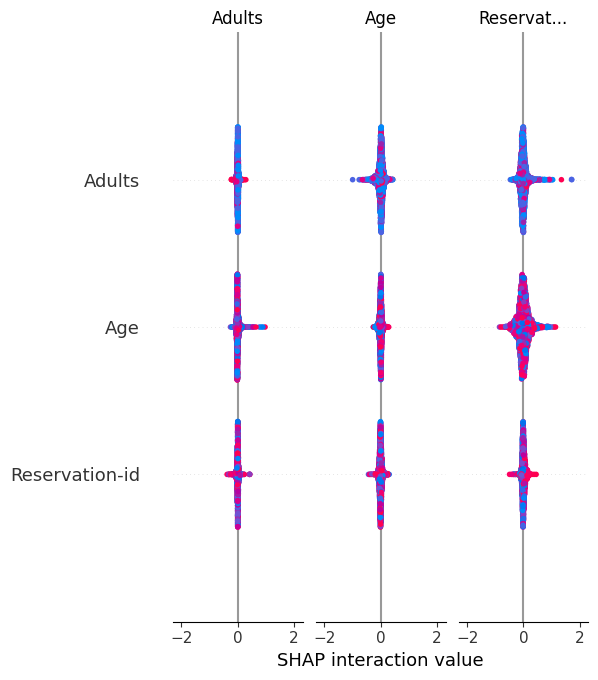

In [76]:
# SHAP Analysis - Explainability (Using LightGBM)
best_model = LGBMClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_valid)

# Check SHAP values shape
print(f"SHAP Values Shape: {np.array(shap_values).shape}")  # Should match (num_classes, num_samples, num_features)
print(f"X_valid Shape: {X_valid.shape}")

# If Multi-Class, Select Class Index for Analysis
if isinstance(shap_values, list):  # If it's a list, it's multi-class classification
    class_index = 1  # Change to 0, 1, or 2 based on the class of interest
    shap_values_selected = shap_values[class_index]
else:  # If it's a single array, it's binary classification
    shap_values_selected = shap_values

# Ensure shape matches before plotting
if shap_values_selected.shape[1] == X_valid.shape[1]:
    shap.summary_plot(shap_values_selected, X_valid)
else:
    print("Error: SHAP values shape does not match X_valid. Try reshaping or checking class index.")